In [21]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from  sklearn.model_selection import train_test_split

In [22]:
df =pd.read_csv("/Users/prathamesh/Desktop/Dsbda/Data sets/NFLX.csv")
print(df.head(6))
print(df.shape)

         Date      Open      High       Low     Close  Adj Close     Volume
0  2002-05-23  1.156429  1.242857  1.145714  1.196429   1.196429  104790000
1  2002-05-24  1.214286  1.225000  1.197143  1.210000   1.210000   11104800
2  2002-05-28  1.213571  1.232143  1.157143  1.157143   1.157143    6609400
3  2002-05-29  1.164286  1.164286  1.085714  1.103571   1.103571    6757800
4  2002-05-30  1.107857  1.107857  1.071429  1.071429   1.071429   10154200
5  2002-05-31  1.078571  1.078571  1.071429  1.076429   1.076429    8464400
(4945, 7)


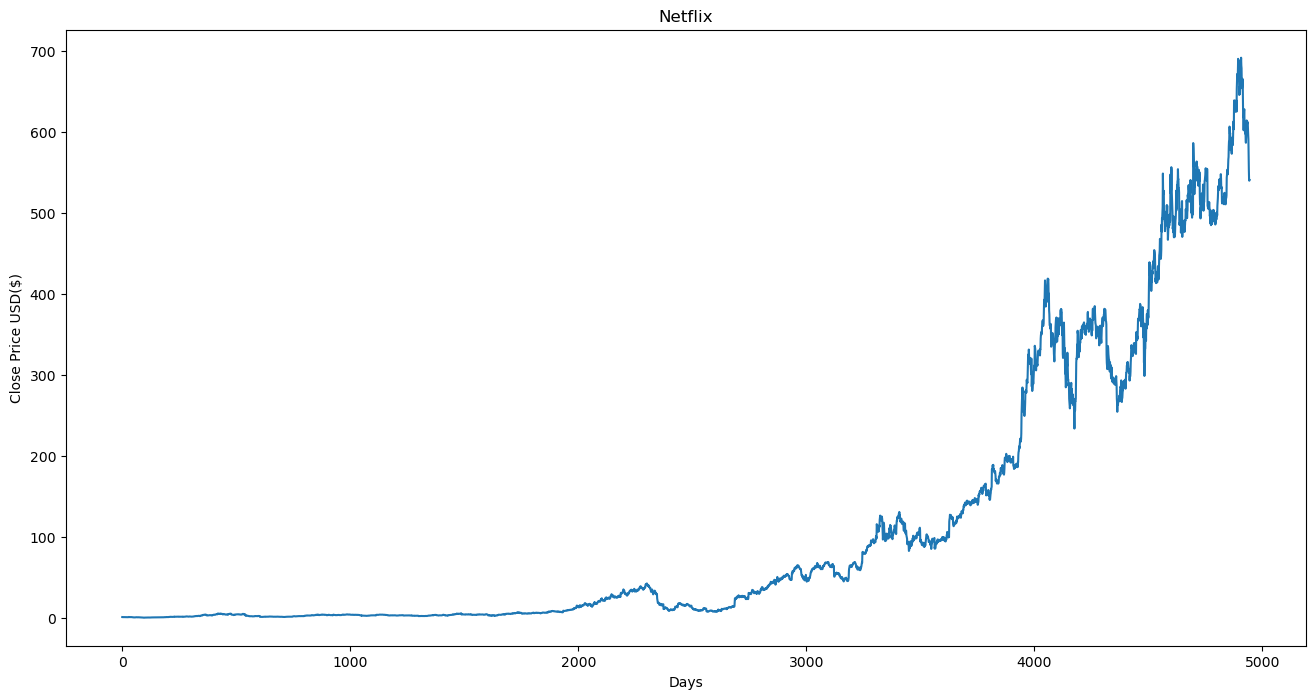

In [23]:
plt.figure(figsize=(16,8))
plt.title('Netflix')
plt.xlabel('Days')
plt.ylabel('Close Price USD($)')
plt.plot(df['Close'])
plt.show()

In [24]:
df = df[['Close']]
print(df.head(4))

      Close
0  1.196429
1  1.210000
2  1.157143
3  1.103571


In [25]:
future_days = 50

In [26]:
df['Prediction'] = df[['Close']].shift(-future_days)
print(df.head(4))
print(df.tail(4))

      Close  Prediction
0  1.196429    0.775000
1  1.210000    0.760714
2  1.157143    0.793571
3  1.103571    0.796429
           Close  Prediction
4941  553.289978         NaN
4942  541.059998         NaN
4943  539.849976         NaN
4944  540.840027         NaN


In [37]:
x = np.array(df.drop(['Prediction'], axis=1))[:-future_days]
print(x)
y = np.array(df['Prediction'])[:-future_days]
print(y)

[[  1.196429]
 [  1.21    ]
 [  1.157143]
 ...
 [662.919983]
 [674.049988]
 [690.309998]]
[  0.775      0.760714   0.793571 ... 541.059998 539.849976 540.840027]


In [38]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

In [39]:

tree = DecisionTreeRegressor().fit(x_train, y_train)

In [40]:
lr = LinearRegression().fit(x_train, y_train)

In [44]:
x_future = df.drop(['Prediction'],axis= 1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
print(x_future)

[[546.880005]
 [553.330017]
 [553.409973]
 [547.580017]
 [550.119995]
 [558.919983]
 [566.179993]
 [569.190002]
 [582.070007]
 [588.549988]
 [590.530029]
 [606.710022]
 [606.049988]
 [597.539978]
 [598.719971]
 [589.289978]
 [577.76001 ]
 [582.869995]
 [586.5     ]
 [589.349976]
 [575.429993]
 [573.140015]
 [590.650024]
 [593.26001 ]
 [592.390015]
 [592.640015]
 [583.849976]
 [599.059998]
 [610.340027]
 [613.150024]
 [603.349976]
 [634.809998]
 [639.099976]
 [631.849976]
 [632.659973]
 [627.039978]
 [624.940002]
 [629.76001 ]
 [633.799988]
 [628.289978]
 [637.969971]
 [639.      ]
 [625.140015]
 [653.159973]
 [664.780029]
 [671.659973]
 [668.52002 ]
 [662.919983]
 [674.049988]
 [690.309998]]


In [45]:
tree_prediction = tree.predict(x_future)
print(tree_prediction)
print ()

[681.169983 688.289978 688.289978 668.400024 645.719971 508.779999
 655.98999  646.909973 657.580017 682.609985 679.330017 687.400024
 687.400024 682.02002  678.799988 659.200012 654.059998 658.289978
 539.419983 663.840027 641.900024 617.77002  616.469971 602.130005
 625.580017 625.580017 658.289978 611.       611.659973 604.559998
 597.98999  605.039978 612.090027 586.72998  586.72998  610.710022
 614.23999  610.710022 613.119995 610.710022 610.539978 612.090027
 602.440002 597.369995 591.150024 539.849976 553.289978 541.059998
 539.849976 540.840027]



In [46]:
lr_prediction = lr.predict(x_future)
print(lr_prediction)

[569.73843792 576.43161226 576.51458256 570.46484004 573.10057398
 582.23231728 589.76602615 592.88951104 606.25508601 612.97935916
 615.03404675 631.82401768 631.13910071 622.30826745 623.53274561
 613.74724643 601.7826042  607.08523317 610.85208761 613.80950632
 599.36474669 596.98843762 615.15856551 617.86694672 616.96415333
 617.22357821 608.10215898 623.88559147 635.59087211 638.50680464
 628.33729957 660.98334921 665.43505731 657.91173581 658.7522693
 652.9204032  650.74125912 655.7429791  659.93526232 654.2175276
 664.26245166 665.33131226 650.94881252 680.0251094  692.08323591
 699.22255047 695.96422276 690.15306707 701.70266788 718.57567241]


/var/folders/kx/cfn79n_51s77smhxdhq3ndfw0000gn/T/ipykernel_1928/4207234045.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Prediction'] = Predictions


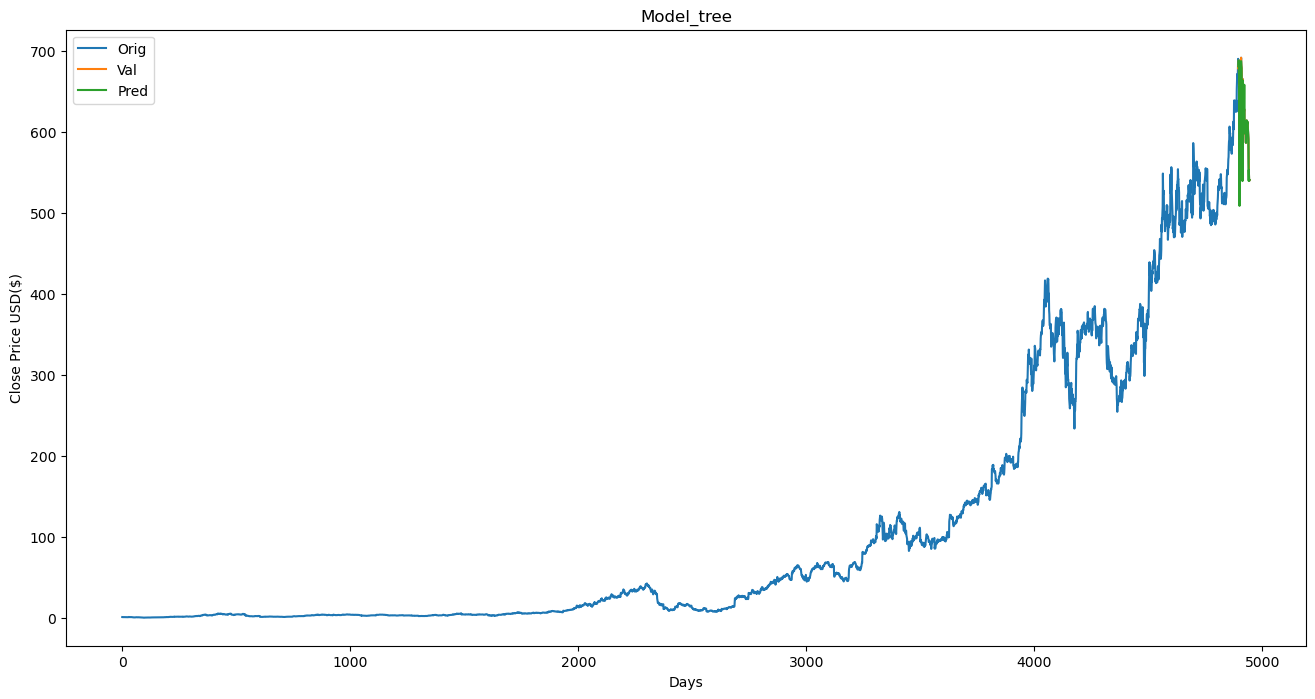

In [47]:
Predictions = tree_prediction
valid = df[x.shape[0]:]
valid['Prediction'] = Predictions
plt.figure(figsize=(16,8))
plt.title('Model_tree')
plt.xlabel('Days')
plt.ylabel('Close Price USD($)')
plt.plot(df['Close'])
plt.plot(valid[['Close', 'Prediction']])
plt.legend(['Orig','Val','Pred'])
plt.show()


/var/folders/kx/cfn79n_51s77smhxdhq3ndfw0000gn/T/ipykernel_1928/4203185425.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Prediction'] = Predictions


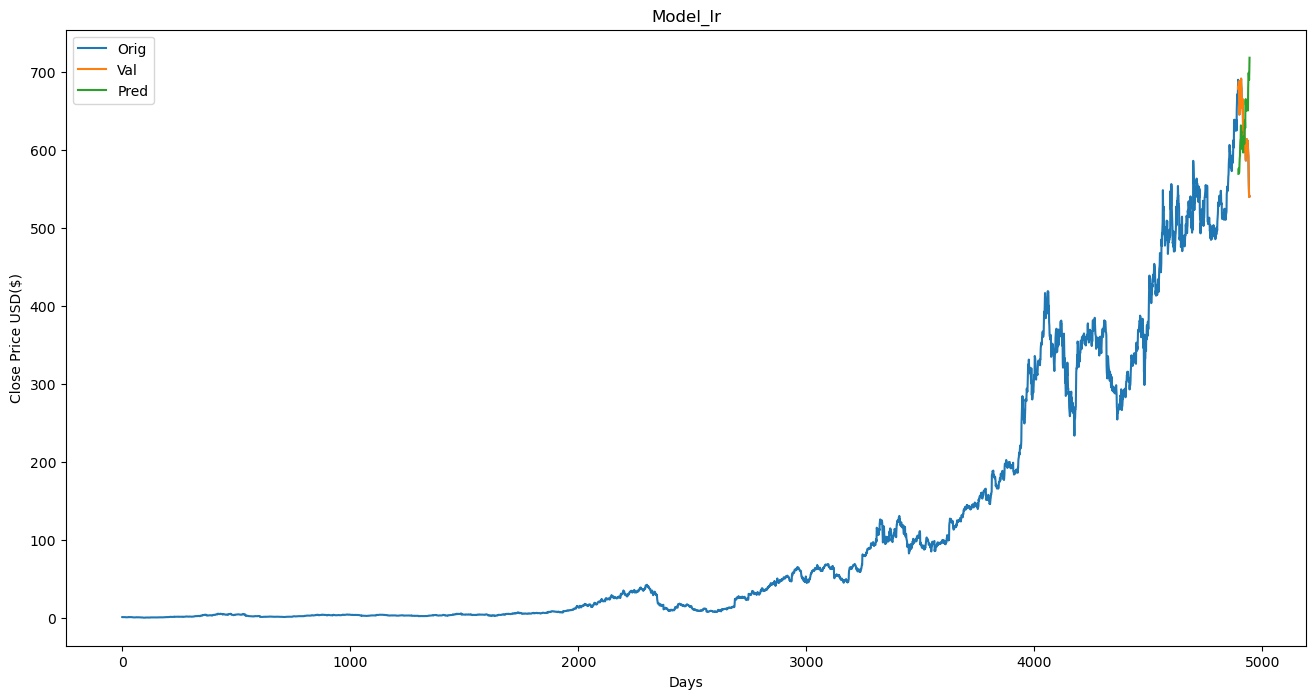

In [48]:
#visualize data
Predictions = lr_prediction
valid = df[x.shape[0]:]
valid['Prediction'] = Predictions
plt.figure(figsize=(16,8))
plt.title('Model_lr')
plt.xlabel('Days')
plt.ylabel('Close Price USD($)')
plt.plot(df['Close'])
plt.plot(valid[['Close', 'Prediction']])
plt.legend(['Orig','Val','Pred'])
plt.show()